# K Means Color Quantization

### Imports


In [54]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import urllib

### Immagine


In [56]:
image_as_array = mpimg.imread('../Risorse/palm_trees.jpg')

In [20]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

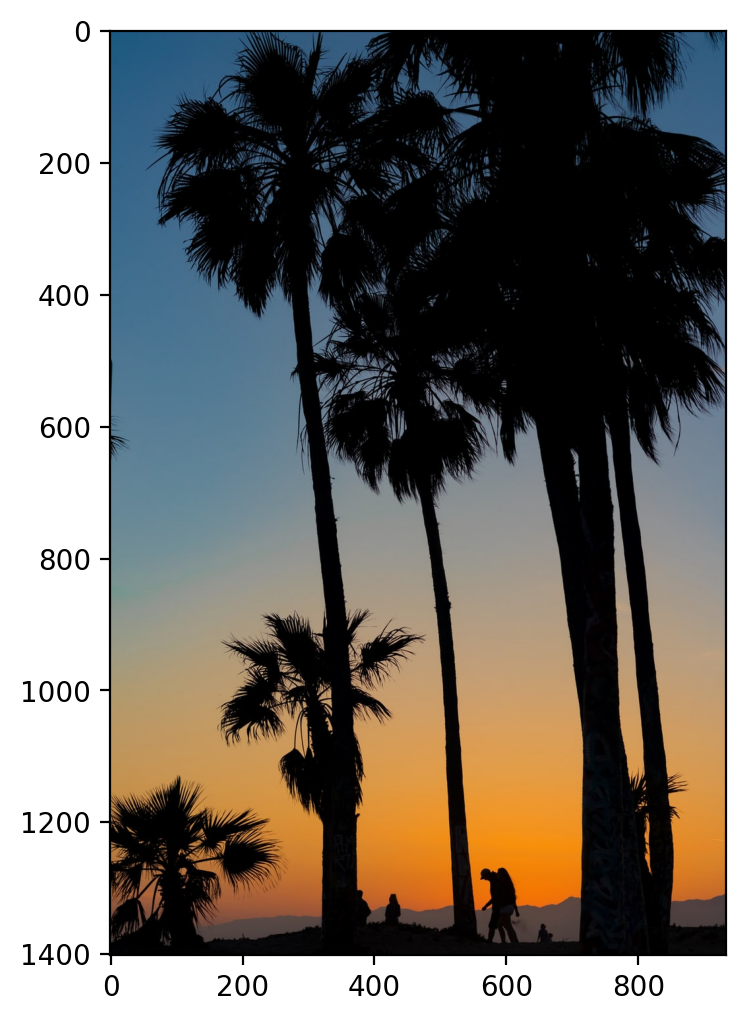

In [21]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Kmeans per discretizzare i colori

Proviamo a ridurre il numero di colori presenti nell'immagine per tenerne 6.

In sostanza si fa con una cluterizzazione di pixel andando a raggruppare tutti i colori presenti in 6 insiemi

In [22]:
image_as_array.shape
# (h,w,3 ) abbiamo 3 canali colore Red Green Blue

(1401, 934, 3)

### Convertire da 3d to 2d

Diventa necessario appiattire la dimensione dell'array in modo da ottenere tutte le "righe colore" in un unico array che ha dimensioni:

`(altezza_immagine * larghezza_immagine), numero_canali_colore`

In [23]:
(h,w,c) = image_as_array.shape


In [24]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [11]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [25]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters=6)

In [27]:
model

KMeans(n_clusters=6)

In [28]:
labels = model.fit_predict(image_as_array2d)

/home/pg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
labels


array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [42]:
# Questi sono i 6 colori che abbiamo tenuto per comporre l'immagine
model.cluster_centers_

array([[136.82331401, 143.76282594, 143.89456654],
       [  2.77058309,   2.57124563,   3.68132513],
       [218.9928282 , 135.65641108,  47.38332267],
       [ 71.33451588, 109.28411433, 137.56015178],
       [ 67.35721379,  61.68101759,  61.9510675 ],
       [191.31149013, 154.49773586, 109.7555489 ]])

In [44]:
# è necessario riportarli a numeri interi
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [45]:
rgb_codes

array([[137, 144, 144],
       [  3,   3,   4],
       [219, 136,  47],
       [ 71, 109, 138],
       [ 67,  62,  62],
       [191, 154, 110]])

In [47]:
# riporto l'array a 3 dimensioni
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [48]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

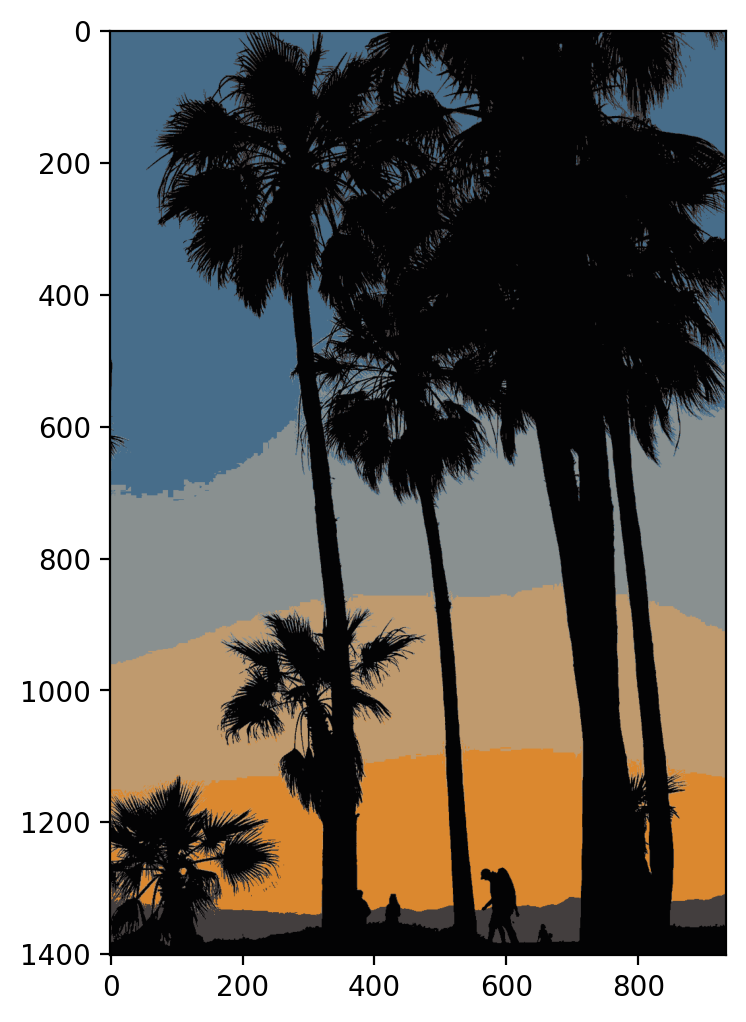

In [49]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)